## Generate example data


In [1]:
from docs_helpers import generate_run_data

generate_run_data(run_len=50)

## Process data with icpmsprocess


Add the package to the system path so it works in this notebook


In [2]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

Import the `load_samples` helper function, the settings and processor objects, and the pre-defined Pb isotope system object and NIST SRM 610 reference material properties


In [3]:
from icpmsprocess.utils import load_samples
from icpmsprocess import ProcessingSettings, DataProcessor
from icpmsprocess.lib import Pb_Pb, NIST610

Tweak these values to make sense for the data you've collected:


In [4]:
settings = ProcessingSettings(
    intensity_metric="208Pb",
    min_signal_intensity=1,
    low_cycles_warning_frac=0.1,
    max_blank_intensity=5e-4,
    blank_cycles=28,
    signal_cycles=(31, 58),
)

Load all the data files in the `data_dir` directory, map them to the sample metadata given in the sample map, and define which isotope system was being measured (in this example, we use the pre-defined Pb-Pb system that we imported earlier)


In [5]:
all_samples = load_samples(
    data_dir="example-data",
    sample_map_path="example-data/sample_map.csv",
    isotope_system=Pb_Pb,
)

Take the sample list that `load_samples` gave us, and process them, using the `NIST610` reference material we imported earlier


In [9]:
processor = DataProcessor(settings=settings, correction_reference_material=NIST610)
output_df = processor.process(all_samples)
output_df.sample(5)

,name,type,206Pb_204Pb,206Pb_204Pb_err,207Pb_204Pb,207Pb_204Pb_err,208Pb_204Pb,208Pb_204Pb_err,207Pb_206Pb,207Pb_206Pb_err,208Pb_206Pb,208Pb_206Pb_err,206Pb_207Pb,206Pb_207Pb_err,208Pb_207Pb,208Pb_207Pb_err
14,my_smpl_014,sample,19.059118,0.014485,15.543139,0.012451,38.809653,0.034501,0.815514,0.000183,2.036254,0.000907,1.226210,0.000269,2.496894,0.001019
20,my_smpl_020,sample,19.033290,0.012925,15.569569,0.011086,40.212118,0.032607,0.818009,0.000207,2.112699,0.000700,1.222469,0.000301,2.582730,0.000840
22,my_smpl_022,sample,18.790026,0.013165,15.432380,0.010865,37.297235,0.029595,0.821303,0.000158,1.985046,0.000686,1.217570,0.000228,2.416889,0.000832
37,my_smpl_036,sample,18.969695,0.016421,15.534335,0.014478,39.377355,0.037762,0.818891,0.000135,2.075928,0.000619,1.221143,0.000198,2.534826,0.000834
19,my_smpl_019,sample,18.939306,0.013862,15.525549,0.011903,43.093425,0.031168,0.819744,0.000175,2.275322,0.000824,1.219882,0.000255,2.775649,0.001160


## Results

The processed data is returned as a Pandas DataFrame, so we can now interpret to our heart's content. Let's plot it up:


Text(0, 0.5, '$\\mathregular{^{207}Pb/^{204}Pb}$')

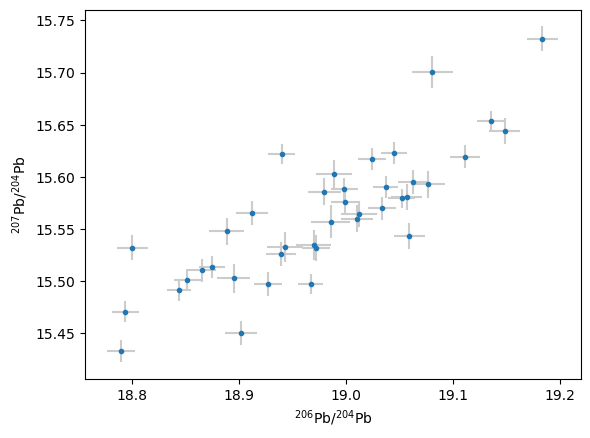

In [7]:
import matplotlib.pyplot as plt

samples = output_df[output_df["type"] == "sample"]

fig, ax = plt.subplots()
ax.errorbar(
    x=samples["206Pb_204Pb"],
    y=samples["207Pb_204Pb"],
    fmt=".",
    xerr=samples["206Pb_204Pb_err"],
    yerr=samples["207Pb_204Pb_err"],
    ecolor="#ccc",
)
ax.set_xlabel(r"$\mathregular{^{206}Pb/^{204}Pb}$")
ax.set_ylabel(r"$\mathregular{^{207}Pb/^{204}Pb}$")

or we can export to a CSV to use elsewhere:


In [8]:
output_df.to_csv("example-data/results.csv", index=False)